# Bayesian statistics
If you are reading this notebook, you are interested in understanding what variational Laplace is, how it is used to do Bayesian statistics, how it relates to neuroscience, active inference, predictive processing, or something along these lines. If you are like me and have very little knowledge in mathematics, you may havee encountered many papers that try to explain variational Laplace and felt more confused than anything. That is not to say that people did a bad job at explaining it in existing text books and papers, there are great resources out there. That being said, most of them require the reader to be already familiar with concepts of mathematics that I would consider quite advanced. This notebook was created to be maximally accessible. I wrote this notebook as I was reading Peter Zeidman's "A primer on variational Laplace", and it is me explaining myself the bits of maths I was missing.

## Intuitions about probabilities using a coin toss example
One thing that I will assume from the reader is that they have some basic knowledge of statistics, though I will explain most of what's needed along the way. We will start from the simple example of tossing a coin to then build our way up to more complex things. 

Let's say we are making a bet with a colleague that our coin is going to land on head, while our colleague bets that it is going to land on tail. Our colleague has trust issues, and he argues that we need to make sure that the coin is fair. If the coin is fair (i.e. balanced), then the bet is fair, because the coin should land on head half of the time and on tail half of the time. But of course if the coin is biased, say it lands more often on head than on tail, then the bet isn't quite fair, the person betting on head has an advantage. 

So before making the bet, we would need to make sure that the coin is fair. How can we know? One way to do this is to run a little experiment. We could throw the coin in the air twice. If the coin is balanced, then we would expect it to land once on head, once on tail. This is not a very good experiment, because this is not what we mean by fair. If the coin would alternate between head and tail on every second try, then it would be a completely deterministic system, meaning we can know exactly what the coin will land on if we know the previous outcome. What we mean by fair is that the chances for the coin to land on head or tail are equal on every single throw. 

So how can we know whether that is truly the case? We can't just toss the coin twice and expect to get one head and one tail after another. It would seem intuitive to say "let's throw the coin many times". Then, we can count how often the coin lands on head and how often it lands on tail to see if across all these tosses, we get half head and half tail. We can conduct this experiment programatically. Even if you don't understand exactly how the code works, you can simply run it, it should be self explanatory.

Let's say we do 10 tosses and see what happens

In [8]:
import numpy as np
np.random.seed(0)
n_throw = 10 # We will throw the coin 10 times
n_head = 0 # Before we start, we have zero head
n_tail = 0 # And zero tails

for i in range(n_throw):  # Repeat the same thing 10 times (throwing the coin)
    rnd = np.random.uniform()  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
    if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
        print(f"Throw {i}: Head")
        n_head += 1
    else:   # If our random number is more than 0.5, we consider that our coin landed on tail
        print(f"Throw {i}: Tail")
        n_tail += 1

# Compute the probability of head and tail:
p_head = n_head/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
p_tail = n_tail/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
print(f"\nP(Head)={p_head}")
print(f"P(Tail)={p_tail}")

Throw 0: Tail
Throw 1: Tail
Throw 2: Tail
Throw 3: Tail
Throw 4: Head
Throw 5: Tail
Throw 6: Head
Throw 7: Tail
Throw 8: Tail
Throw 9: Head

P(Head)=0.3
P(Tail)=0.7


So after 10 throw, we can see that our coin doesn't always land on head nor only on tail. Depending on the "trial", the coin can either land on head or tail, which is already something, it really wouldn't make any sense to make a bet if it were otherwise. But unfortunately, across our 10 throws, it didn't land half of the time on head and half of the time on head. Instead, we can see that in our experiment, it landed 30% of the time on head and 70% of the time on tail. That doesn't seem very balanced. At the same time, you might argue that maybe the coin is indeed balanced, it is just that in these 10 throws, we got "unlucky" because it landed more often on tail than on head. Indeed, if whether we get head or tail is random in each toss, then even if the coin is balanced, it is not impossible to get 7 times tail out of 10 throws. It is also not impossible to get 10 times head in a row. 

That being said, you probably get the intuition that while it is possible to get 10 times head in a row, it is not very likely. And you are even less likely to get 1000 heads in a row if you were to do a 1000 throws.

Back to our initial problem: we want to know if our coin is fair. Yet when we do 10 throws, we don't know whether we can trust our results, because maybe we got a bit "unlucky" with our 10 throws and ended up in a case that is not representative of the fairness of our coin. How can we do a better experiment? Well just as when we said that throwing the coin twice isn't enough to tell whether the coin is balanced, it is quite intuitive to think that 10 times isn't enough either. So we can try to increase the number of coin tosses we make: the more often we repeat our little experiment (throwing a coin), the more reliable our final probability for head and tail, and the more confident we can be in our final answer as to whether the coin is biased. Let's try it out:

In [9]:
# Same as before, but let's increase the number of throws:
n_throw = 20 # 20 throws instead of 10
n_head = 0 # Before we start, we have zero head
n_tail = 0 # And zero tails

for i in range(n_throw):  # Repeat the same thing 10 times (throwing the coin)
    rnd = np.random.uniform()  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
    if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
        print(f"Throw {i}: Head")
        n_head += 1
    else:   # If our random number is more than 0.5, we consider that our coin landed on tail
        print(f"Throw {i}: Tail")
        n_tail += 1

# Compute the probability of head and tail:
p_head = n_head/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
p_tail = n_tail/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
print(f"\nP(Head)={p_head}")
print(f"P(Tail)={p_tail}")

Throw 0: Tail
Throw 1: Tail
Throw 2: Tail
Throw 3: Tail
Throw 4: Head
Throw 5: Head
Throw 6: Head
Throw 7: Tail
Throw 8: Tail
Throw 9: Tail
Throw 10: Tail
Throw 11: Tail
Throw 12: Head
Throw 13: Tail
Throw 14: Head
Throw 15: Tail
Throw 16: Head
Throw 17: Tail
Throw 18: Tail
Throw 19: Head

P(Head)=0.35
P(Tail)=0.65


We can see that when we increase the number of throws, the final probability change, and it seems to get closer to 50/50. But still not quite 50/50. So the same question applies again: is our coin biased, or is it just that particular draw that didn't land on 50/50? We can try to increase the number of throws to much more, say a 1000:

In [10]:
# Same as before, but let's increase the number of throws:
n_throw = 1000 # 20 throws instead of 10
n_head = 0 # Before we start, we have zero head
n_tail = 0 # And zero tails

for i in range(n_throw):  # Repeat the same thing 10 times (throwing the coin)
    rnd = np.random.uniform()  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
    if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
        print(f"Throw {i}: Head")
        n_head += 1
    else:   # If our random number is more than 0.5, we consider that our coin landed on tail
        print(f"Throw {i}: Tail")
        n_tail += 1

# Compute the probability of head and tail:
p_head = n_head/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
p_tail = n_tail/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
print(f"\nP(Head)={p_head}")
print(f"P(Tail)={p_tail}")

Throw 0: Head
Throw 1: Tail
Throw 2: Head
Throw 3: Tail
Throw 4: Head
Throw 5: Tail
Throw 6: Tail
Throw 7: Tail
Throw 8: Tail
Throw 9: Tail
Throw 10: Head
Throw 11: Head
Throw 12: Tail
Throw 13: Head
Throw 14: Tail
Throw 15: Tail
Throw 16: Head
Throw 17: Head
Throw 18: Head
Throw 19: Head
Throw 20: Tail
Throw 21: Head
Throw 22: Tail
Throw 23: Head
Throw 24: Head
Throw 25: Head
Throw 26: Tail
Throw 27: Head
Throw 28: Head
Throw 29: Head
Throw 30: Head
Throw 31: Head
Throw 32: Tail
Throw 33: Head
Throw 34: Head
Throw 35: Head
Throw 36: Tail
Throw 37: Head
Throw 38: Tail
Throw 39: Head
Throw 40: Tail
Throw 41: Head
Throw 42: Tail
Throw 43: Tail
Throw 44: Tail
Throw 45: Head
Throw 46: Head
Throw 47: Head
Throw 48: Head
Throw 49: Head
Throw 50: Head
Throw 51: Head
Throw 52: Head
Throw 53: Tail
Throw 54: Tail
Throw 55: Head
Throw 56: Tail
Throw 57: Head
Throw 58: Tail
Throw 59: Tail
Throw 60: Head
Throw 61: Tail
Throw 62: Head
Throw 63: Tail
Throw 64: Head
Throw 65: Head
Throw 66: Tail
Throw

When we increase the number of iterations to a 1000, the probability of head and tail seems to get close to 50/50. And if our intuition that we should get more reliable answer if we throw the coin more often is true, then the result of this experiment would lead us to believe that our coin is probably not biased. There is one way in which we can show that increasing the number of throws yields a more reliable answer. We could perform the same experiment several times. 

Let's say we have a first experiment in which we throw the coin 10 times, and a second experiment in which we throw the coin 1000 times. To know which of these two experiments is most reliable, we can repeat each experiment 10 times. A more reliable experiment should gives similar results across repetitions. 

In [11]:
# Same as before, but let's increase the number of throws:
n_iteration = 5

# ========================================================
# Experiment 1:
print("="*40)
print("Experiment 1")
for i in range(n_iteration):
    n_throw = 10 # 20 throws instead of 10
    n_head = 0 # Before we start, we have zero head
    n_tail = 0 # And zero tails

    for ii in range(n_throw):  # Repeat the same thing 10 times (throwing the coin)
        rnd = np.random.uniform()  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
        if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
            n_head += 1
        else:   # If our random number is more than 0.5, we consider that our coin landed on tail
            n_tail += 1

    # Compute the probability of head and tail:
    p_head = n_head/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
    p_tail = n_tail/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
    print(f"P(Head)={p_head}/P(Tail)={p_tail}")

# ========================================================
# Experiment 2:
print("="*40)
print("Experiment 2")
for i in range(n_iteration):
    n_throw = 1000 # 20 throws instead of 10
    n_head = 0 # Before we start, we have zero head
    n_tail = 0 # And zero tails

    for ii in range(n_throw):  # Repeat the same thing 10 times (throwing the coin)
        rnd = np.random.uniform()  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
        if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
            n_head += 1
        else:   # If our random number is more than 0.5, we consider that our coin landed on tail
            n_tail += 1

    # Compute the probability of head and tail:
    p_head = n_head/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
    p_tail = n_tail/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
    print(f"P(Head)={p_head}/P(Tail)={p_tail}")

Experiment 1
P(Head)=0.6/P(Tail)=0.4
P(Head)=0.5/P(Tail)=0.5
P(Head)=0.6/P(Tail)=0.4
P(Head)=0.6/P(Tail)=0.4
P(Head)=0.5/P(Tail)=0.5
Experiment 2
P(Head)=0.481/P(Tail)=0.519
P(Head)=0.497/P(Tail)=0.503
P(Head)=0.531/P(Tail)=0.469
P(Head)=0.512/P(Tail)=0.488
P(Head)=0.507/P(Tail)=0.493


We can see that in the first experiment (where we throw the coin 10 times), the results we get differ quite a bit between repetition, sometimes we get 50/50, but sometimes we get 20% head, 80% tail. In comparison, the results of the second experiment (where we throw the coin 1000 times) vary much less across repeats: we get results between 40% and 60% probability for head and tail. So it would seem that our intuition that throwing the coin many times gets us more reliable results. So if we want to know if our coin is biased or not, we should throw the coin many many times. 

In the experiment where we throw the coin a 1000 times, we observe probabilities that are very close to 50/50, so it would seem fair to conclude that the coin most likely isn't biased and we can proceed with our bet. 

## Formalizing our intuition

In the experiment above, we tried to figure out what the probability of head and tail are by running an experiment. In other words, we tried to infer the **True** probability of head and tail using experimental data. We threw the coin several times and computed the **experimental** or **empirical** probability of head and tail. And we can clearly see that the **empirical probability** of head or tail is not exactly the same as the **true probability** of head or tail, because the actual values we obtained in our experiment varied across experiments, and depending on the exact parameters of the experiment (the number of throw we used to compute the empirical probability). In a nutshell, the field of probability and statistics is dedicated to finds ways in which we can reach the best conclusions about some things we cannot know (such as the True probability of head or tail) based on data. The goal is therefore to formalize several of the intuitions you may have had before, to find convenient mathematical solutions to know which conclusion is the most appropriate. 

### Definitions:
Let's start by getting some simple mathetmatical notations out of the way. In our experiment above, we tried to figure out what the true probability of head or tail is. The true probability of a given event (head or tail) is usually written as follows:
$$P(A) = \frac{|A|}{|\Omega|}$$
Which reads:
$$P(event) = \frac{Number\ of\ favorable\ outcomes\ for\ event\ A}{Total\ number\ of\ possible\ outcomes\ in\ the\ sample\ space}$$

In probability theory, the various terms in the bottom equation refer to quite simple things:
- **Event**: a specific outcome of an experiment. In the case of a coin toss, this is either getting head or tail. But say we want to run another experiment in which we draw a card in a 52 cards deck at random, drawing a king of spade would also be an event for example. 
- **Sample space**: set of all possible outcomes of the experiment. In our coin toss example, the sample space is basically head and tail, as these are the only two possible outcomes from throwing a coin. Similarly, if we draw a card from a deck, the sample space is basically all the cards in the deck. And so in the case of a coin toss, the total number of possible outcome in the sample space is 2, but in an experiment where we draw a card, it's 52. 
- **Number of favorable outcomes for event A**: how often does the event occurs out of all the possible outcomes. This is basically the quantity that defines the probability of that particular event. 

So say we have a fair coin, the number of favorable outcomes for event head should be 1 and the total number of outcomes is 2. So we have:
$$P(Head) = \frac{1}{2}$$
And 
$$P(Tail) = \frac{1}{2}$$
And because head and tail are the two possible outcomes, the sum of the probability of both events should sum up to 1. In comparison, the probability of picking up a king of spade is:
$$P(King\ of\ Spade) = \frac{1}{52}$$
And of picking up a jack of heart:
$$P(Jack\ of\ Heart) = \frac{1}{52}$$
If we sum the probability of a king of spade and of a jack of heart, we don't get 1, which means that we are missing some events. 

An important thing to understand is that the probability defined above refer to the true probability of each event. This is what we want to figure out in our experiment above. But we would only obtain the true probability of each event if we were to run an infinity of experiments. Since we can't run an infinity of experiments, we can not get the true probability of each event. Instead, we get the **empirical probability**, which is usually depicted like so:
$$
\hat{P}(E) = \frac{\text{Number of times event } E \text{ occurs}}{\text{Total number of trials}}
$$
The hat just indicates that this is something we obtained from an experiment and isn't the true probability of a given event.

## The Bernoulli distribution: a single formulae to express the probability of each event
When we throw a fair coin, the probability of obtaining head should be 0.5 and the probability of obtaining tail is 0.5. So based on the definition we have laid out above:
$$P(Head) = 0.5$$
$$P(Tail) = 0.5$$
And as we have mentioned above, the probability of the two events should be 1, because there are no other possible outcome. So if we know the probability of head, we know the probability of head, we know the probability of tail:
$$P(Head) + P(Tail) = 1$$
$$P(Head) = 1 - P(Tail)$$

Now head and tail are very specific words that only make sense when the experiment is tossing a coin. But there are many other kind of things that have a binary outcome: either one thing happens or another thing happens, and each thing has its own probability of occuring. So to put it in the kind of linguo we have defined above: there are many instances in which a  random process in which the sample space only contains two (mutually exclusive) events. So to be more general, we can define the one outcome as 1 and the other as 0. And very often, you will see the 1 being referred as success and the 0 as failure, but that's just a convention, nothing more. So for our fair coin, we can write:
$$P(X=1) = 0.5$$
$$P(X=0) = 0.5$$

So for any such problem, we have two events: 0 and 1 (head or tail, pass or fail a test...), and each event has its own probability. We can write a formulae that describes the probability of each event like so:
$$P(X = x) = P(X = 1)^x*P(X = 0)^{1-x}$$
This is the formulae of the Bernoulli distribution, which describes the outcome of a signle experiment that can have just two possible outcomes

So in the case of a fair coin:
$$P(X = 0) = 0.5^0*0.5^{1} = 0.5$$ 

Now at this point you might wonder: what's the point of the Bernoulli distribution? It's a function for which we need both $P(X = 1)$ and $P(X = 0)$ just so we can compute P(X = 1) or P(X = 0), what's the point? On it's own it is not very useful. It is just a way to express the probability of both events using the same formulae. It basically "switches on" P(X=1) and "switches off" P(X=0) when X = 1 and the other way around. And it is something that is very helpful for doing more complicated things, as we will see in a bit. 

Let's just write some code to illustrate the Bernoulli distribution:

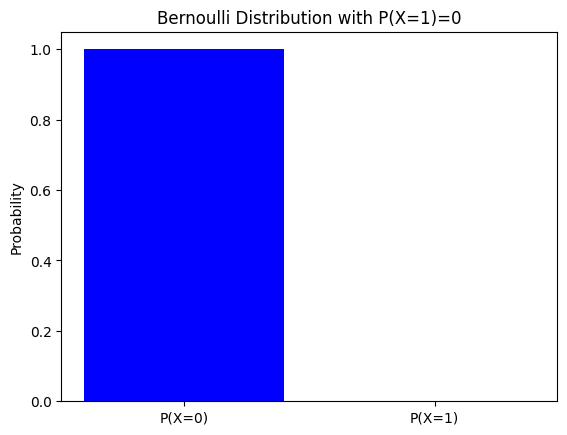

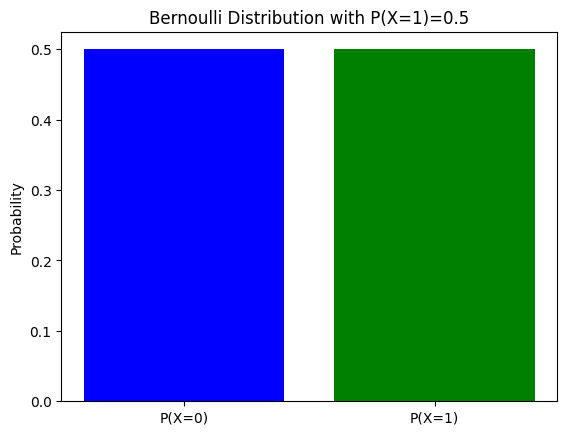

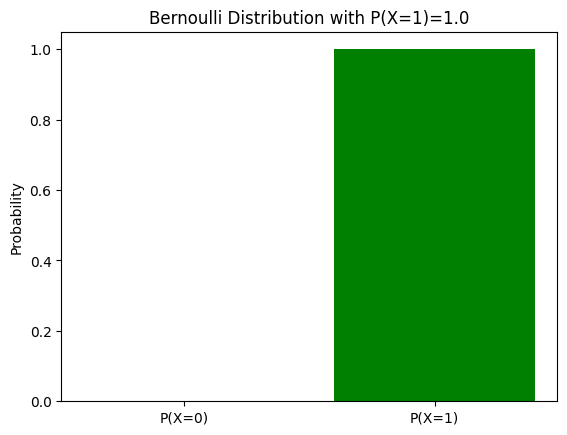

In [12]:
import matplotlib.pyplot as plt
import time

ps = [0, 0.5, 1.0]  # Showing the probability of P(X=0) and P(X=1) at various values of P(X=1)
P = {}
for p in ps:
    q = 1 - p  # the probability of failure is 1 - the probability of success
    P["X=0"] = p**0*q**1  # P(X=0) = P(x=1)^0 * P(X=0)^(1-0)
    P["X=1"] = p**1*q**0  # P(X=0) = P(x=1)^0 * P(X=0)^(1-0)
    plt.bar(["P(X=0)", "P(X=1)"], [P["X=0"], P["X=1"]], color=['blue', 'green'])
    plt.title(f'Bernoulli Distribution with P(X=1)={p}')
    plt.ylabel('Probability')
    plt.show()


## The Binomial distribution: a formulae to determine how likely a given empirical probability is based on any given true probability
To recap what we have seen so far: if we want to know whether a coin is biased, we need to figure out if the probability of head is 0.5:
$$P(X=1) = 0.5$$
And according to the Bernoulli formulae:
$$P(X = x) = P(X = 1)^x*P(X = 0)^{1-x}$$

But since we know neither P(X = 1) nor P(X = 0), we cannot know for sure whether the coin is biased. Instead, we can run an experiment to obtain the empirical probability of head (and tail):
$$
\hat{P}(X=1) = \frac{\text{Number of times event } E \text{ occurs}}{\text{Total number of trials}}
$$

And as our intuition tells us, the empirical distribution will be more reliable if we have conducted more experiments. Another way we can rephrase that intuition is that if an event has a given true probability, then we are most likely to observe that probability when we run an experiment. And the more often we repeat that experiment, the less likely it becomes that we observe something different from that probability. This intuition is correct, and as it turns out, we can compute how likely are different experimental outcomes under a given true probability. To put it in the terms of our coin toss experiment, we can compute how likely we are to observe a certain proportion of heads (out of all tosses) if the true probability of head is 0.5, and that likelihood is a direct function of the number of throw we make. 

So when we do an experiment to obtain the empirical probability of head, we are basically conducting a series of single experiment, where each single experiment can be modelled using the Bernoulli distribution above. And we want to be able to answer the question: **When I do n coin toss, if the true probability to obtain head is 0.5, how likely am I to observe x/n throws**. In other words, we want to know what is the probability of observing a given number of head, if the true probability of getting head is 0.5. It sounds a bit convoluted, because we are now talking about different probabilities at once, and it is important to understand the distinction between them:
- $P(X=1) = 0.5$: This is the true probability of getting head. We basically want to know if this is true, to be able to answer the question of whether or coin is biased
- $\hat{P}(X=1)=heads/nthrow$ / # throw: This is the experimental probability of getting head. We throw the coin n times and we count how often we get head
- $P(hat{P}(X=1)|P(X=1))$: This is the probability of obtaining a given value for $\hat{P}(X=1)$ for a given value of $P(X=1)$. 
The latter quanity might sound a bit confusing at first. This quantity tells us how likely a given empirical probability of head is if for example our true probability of head is 0.5. Why do we need that? It is because we in fact can never know the true probability of head, and accordingly, we can never know for sure whether the coin is biased. But what we can know however is how likely our observation are if the true probability is 0.5, and in turn, we can know how likely it is that our coin has a probability of head of 0.5.

When we throw our coin a bunch of times, we are generating a sequence of events. But when we zoom out, the sequence we generate is itself random as well, so we are also dealing with probabilities at that level. Say we throw the coin two times, we have the following possible outcomes:
- Head Head
- Tail Tail
- Tail Head
- Head Tail
So for each single throw, we have 2 possible outcome. The sample space is 2. But when we throw the coin twice, the sample space is 4: we have four possible sequence. If we were to throw the coin 3 times, the possible sequences would be:
- Head Head Head
- Tail Tail Tail
- Head Head Tail
- Head Tail Tail
- Tail Tail Head
- Tail Head Head
- Tail Head Tail
- Head Tail Head

If we throw the coin three times, the sample space is 8, we have eight possible sequences. We can see a relationship: if we have $n$ tosses, we have $2^n$ possible outcomes. Now, say we supposed that our coin is fair (P(X=1) = 0.5), we can know the probability of each given sequence:

$$P(Head Head Tail) = (P(X = 1)^1*P(X = 0)^0) * (P(X = 1)^1*P(X = 0)^0) * (P(X = 1)^0*P(X = 0)^1)$$
$$ = P(X = 1)^1 * P(X = 1)^1 * P(X = 0)^1$$
$$ = 0.5 * 0.5 * 0.5 = 0.125$$

Importantly, for our particular case, we are not so interested in knowing the probability of a particular sequence. We want to know, what is the probability of observing a given number of heads out of the number of toss we make. Accordingly, we want to know how likely we are to observe:
- Head Head Head (because in all these sequences, we have 3/3 heads)
- Head Head Tail or Tail Head Head or Head Tail Head (because in all these sequences, we have 2/3 heads)
- Tail Tail Head or Tail Head Tail or Head Tail Tail (because in all these sequences, we have 1/3 heads)
- Tail Tail Tail (because in all these sequences, we have 0/3 heads)

Accordingly, we can get the probability for each of these outcomes by summing the probability of sequences in which the number of heads matches:
$$ P(X = 3H) = P(Head Head Head)$$
$$ P(X = 2H) = P(Head Head Tail) + P(Tail Head Head) + P(Head Tail Head)$$
$$...$$

As it turns out, there is also a formulae that enables to compute for a given probability of success and a number of observation, what the probability of observing a given number of success is. This is the Binomial distribution:
$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$
Where $n$ is the number of experiments (i.e. throws), $k$ is the number of success, p is still $P(X=1)$ for a single coin toss. 

## Usage of the Binomial distribution
With this formulae, we can compute the quantity we are interested in. Let's see how:

In [13]:
import math

def binomial_distribution(n, k, p):
    '''
    Calculate the binomial probability P(X = k) for n trials, k successes, and success probability p.
    P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
    :param n: Total number of trials
    :param k: Number of successes
    :param p: Probability of success on a single trial
    :return: Binomial probability P(X = k)
    '''
    # Calculate the binomial coefficient (n choose k)
    binom_coeff = math.comb(n, k)  # Calculate n choose k: \binom{n}{k}
    
    # Calculate the binomial probability using the formula
    probability = binom_coeff * (p ** k) * ((1 - p) ** (n - k))
    
    return probability

We have now created a function that can take a given number of toss, a given number of head, a given probability of head and tell us how likely that observation is. We can now go back to the experiments we ran above, and see what that would look like

In [14]:
# Assuming our coin is unbiased:
p = 0.5

# In the first example, we simulated throwing the coin 10 times, and got 3 times head
print(f"P(X = 3/10 heads)={binomial_distribution(10, 3, p)}")


P(X = 3/10 heads)=0.1171875


According to the binomial distribution, we have 11% chances of getting 3 times head out of 10 throws. In other words, if we were to repeat the same experiment (throwing an unbiased coin 10 times) a 100 times, we would obtain 3 heads about 12 times*. 

In just the same way as before, we can get the probability of obtaining the results we got when running a 1000 iterations:

In [15]:
# In the first example, we simulated throwing the coin 10 times, and got 3 times head
print(f"P(X = 500/1000 heads)={binomial_distribution(1000, 500, p)}")

P(X = 500/1000 heads)=0.0252250181783608


Interestingly, the probability of getting exactly 50% head when we do a 1000 toss is lower than the probability to get 30% head when we throw the coin only 10 times. This seems counter-intuitive, as we said that the more throw we perform, the more we can trust our estimate. But how can that be true if our estimate is so unlikely according to the Binomial distribution? This is because when we throw the coin a 1000 times, we have many more possible outcomes ($2^1000$), so ultimately, any single outcome is less likely. 

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

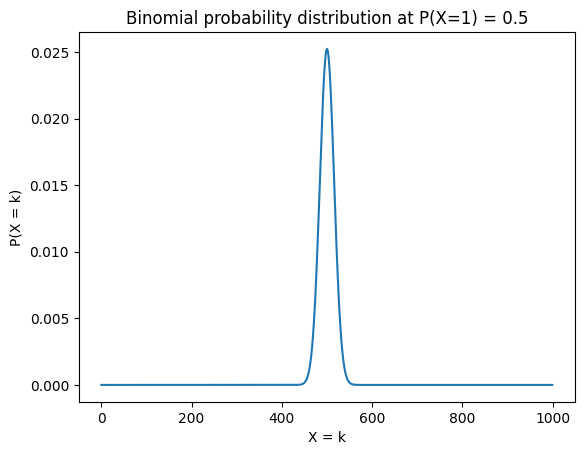

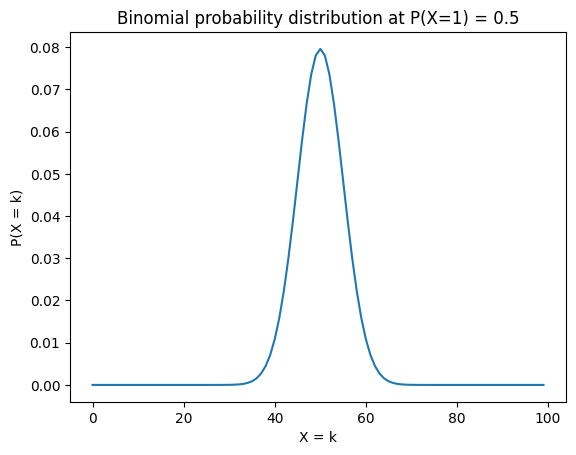

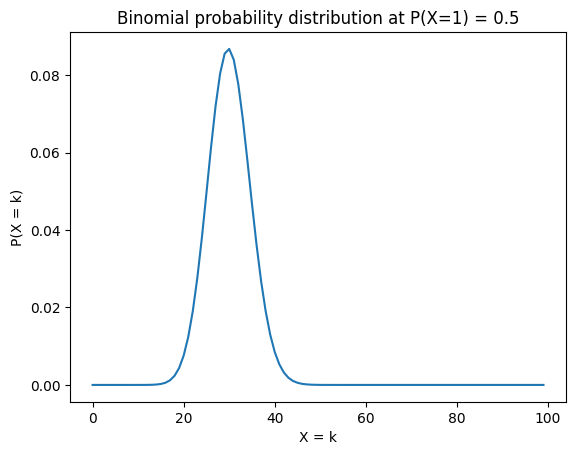

: 

In [30]:
distribution = [binomial_distribution(1000,k, p) for k in range(1000)]
fig, ax = plt.subplots()
ax.plot(list(range(1000)), distribution)
ax.set_xlabel("X = k")
ax.set_ylabel("P(X = k)")
ax.set_title("Binomial probability distribution at P(X=1) = 0.5")
plt.close

distribution = [binomial_distribution(100,k, p) for k in range(100)]
fig, ax = plt.subplots()
ax.plot(list(range(100)), distribution)
ax.set_xlabel("X = k")
ax.set_ylabel("P(X = k)")
ax.set_title("Binomial probability distribution at P(X=1) = 0.5")
plt.close

distribution = [binomial_distribution(100,k, 0.3) for k in range(100)]
fig, ax = plt.subplots()
ax.plot(list(range(100)), distribution)
ax.set_xlabel("X = k")
ax.set_ylabel("P(X = k)")
ax.set_title("Binomial probability distribution at P(X=1) = 0.5")
plt.close

### *A little aside: we can compute the empirical probability of obtaining 3/10 heads+
In fact, we can very easily verify that this is true by running another little simulation (very much the same we did before):

In [17]:
# Let's repeat the 10 coin tosses a 10000 times, just to we get closer to the actual value:
n_iteration = 10000

# ========================================================
# Experiment 1:
P["X=3/10 heads"] = 0
for i in range(n_iteration):
    n_throw = 10 # 20 throws instead of 10
    n_head = 0 # Before we start, we have zero head
    n_tail = 0 # And zero tails

    for ii in range(n_throw):  # Repeat the same thing 10 times (throwing the coin)
        rnd = np.random.uniform()  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
        if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
            n_head += 1
        else:   # If our random number is more than 0.5, we consider that our coin landed on tail
            n_tail += 1
    if n_head == 3:
        P["X=3/10 heads"] += 1
print(f"P(X = 3/10 heads)={P["X=3/10 heads"] / n_iteration}")

P(X = 3/10 heads)=0.1181


So as you can see, when we run the same experiment 10000 times, we get about 12% of the times 3 heads, in line with the Binomial distribution. This may seem familiar with how I described above how we can obtain an empirial probability. With binomial distribution, we get $P(X=3)$, and with simulation above, we get $\hat{P}(X=3)$